In [1]:

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.cluster.hierarchy as sch

In [221]:
from pathlib import Path
sns.set_context('notebook')
sns.set_style('darkgrid')
paper_path = Path("/home/salabed/workspace/latex/eurosys-2021/figs")


dataset_x = pd.read_csv("params_all.csv", index_col = 0)
dataset_y = pd.read_csv("slo_all.csv", index_col = 0).fillna(0)

In [49]:
dataset_x_w_target = dataset_x.copy()
dataset_x_w_target = pd.concat([dataset_x_w_target, dataset_y[['mixgraph_iops',
                                        'rocksdb_bytes_per_read_count',
                                        'rocksdb_read_block_get_micros_p99',
                                        'FileReadStatsLevel1_p99'
                                        ]]
                               ], axis=1
                               )

In [51]:
dataset_x_w_target.corr()['mixgraph_iops']

max_background_compactions            0.166573
max_background_flushes                0.168114
write_buffer_size                     0.919303
max_write_buffer_number               0.221628
min_write_buffer_number_to_merge      0.128936
max_bytes_for_level_multiplier        0.157850
block_size                            0.050316
level0_file_num_compaction_trigger    0.138635
level0_slowdown_writes_trigger        0.082847
level0_stop_writes_trigger            0.101703
mixgraph_iops                         1.000000
rocksdb_bytes_per_read_count          1.000000
rocksdb_read_block_get_micros_p99    -0.434052
FileReadStatsLevel1_p99              -0.412893
Name: mixgraph_iops, dtype: float64

In [222]:
correlations = dataset_y.corr()
iops_corr = abs(correlations['mixgraph_iops'])
highly_relv_features = iops_corr[iops_corr>0.5].keys().tolist()

In [223]:
dataset_x_w_target = dataset_x.copy()
dataset_x_w_target = pd.concat([
    dataset_x_w_target,
    dataset_y[highly_relv_features]
    ], axis=1
)
results_corr =  dataset_x_w_target.corr()

In [224]:
rocksdb_params = dataset_x.columns.tolist()

relevant_map = {}
for param in rocksdb_params:
    param_corr = abs(results_corr[param])
    relevant_map[param] = param_corr[param_corr > 0.5].keys().tolist()

In [225]:
from collections import Counter, defaultdict

d = defaultdict(int)
seen = defaultdict(list)
for k, values in relevant_map.items():
    for v in values:
        d[v] += 1
        seen[v].append(k)
print(Counter(d).most_common(10))
seen

[('max_background_compactions', 1), ('max_background_flushes', 1), ('write_buffer_size', 1), ('mem_p99', 1), ('mixgraph_latency', 1), ('mixgraph_iops', 1), ('mixgraph_io_size', 1), ('rocksdb_memtable_miss_count', 1), ('rocksdb_number_keys_written_count', 1), ('rocksdb_number_keys_read_count', 1)]


defaultdict(list,
            {'max_background_compactions': ['max_background_compactions'],
             'max_background_flushes': ['max_background_flushes'],
             'write_buffer_size': ['write_buffer_size'],
             'mem_p99': ['write_buffer_size'],
             'mixgraph_latency': ['write_buffer_size'],
             'mixgraph_iops': ['write_buffer_size'],
             'mixgraph_io_size': ['write_buffer_size'],
             'rocksdb_memtable_miss_count': ['write_buffer_size'],
             'rocksdb_number_keys_written_count': ['write_buffer_size'],
             'rocksdb_number_keys_read_count': ['write_buffer_size'],
             'rocksdb_bytes_written_count': ['write_buffer_size'],
             'rocksdb_number_db_seek_count': ['write_buffer_size'],
             'rocksdb_number_db_next_count': ['write_buffer_size'],
             'rocksdb_number_db_seek_found_count': ['write_buffer_size'],
             'rocksdb_number_db_next_found_count': ['write_buffer_size'],
          

In [226]:
relevant_map

{'max_background_compactions': ['max_background_compactions'],
 'max_background_flushes': ['max_background_flushes'],
 'write_buffer_size': ['write_buffer_size',
  'mem_p99',
  'mixgraph_latency',
  'mixgraph_iops',
  'mixgraph_io_size',
  'rocksdb_memtable_miss_count',
  'rocksdb_number_keys_written_count',
  'rocksdb_number_keys_read_count',
  'rocksdb_bytes_written_count',
  'rocksdb_number_db_seek_count',
  'rocksdb_number_db_next_count',
  'rocksdb_number_db_seek_found_count',
  'rocksdb_number_db_next_found_count',
  'rocksdb_db_iter_bytes_read_count',
  'rocksdb_wal_bytes_count',
  'rocksdb_write_self_count',
  'rocksdb_write_wal_count',
  'rocksdb_number_iter_skip_count',
  'rocksdb_num_iterator_created_count',
  'rocksdb_num_iterator_deleted_count',
  'rocksdb_db_get_micros_p50',
  'rocksdb_db_get_micros_count',
  'rocksdb_db_get_micros_sum',
  'rocksdb_db_write_micros_p50',
  'rocksdb_db_write_micros_count',
  'rocksdb_db_write_micros_sum',
  'rocksdb_db_seek_micros_p50',
  '

In [227]:
# {
# "level_1_rn_gb": ['max_background_compactions',
#               'max_background_flushes',
#               'max_write_buffer_number',
#               'min_write_buffer_number_to_merge',
#               'block_size',
#               'level0_slowdown_writes_trigger',
#               'level0_stop_writes_trigger']
# "level_1_wnew_gb" #
# "level_1_out_files" #
# "FileReadStatsLevel1_min" # 1

In [293]:
# correlations['level_1_w_amp'][abs(correlations['level_1_w_amp']) > 0.5]


correlations = dataset_y.corr()
iops_corr = abs(correlations['mixgraph_iops'])
highly_relv_features = iops_corr[iops_corr>0.5].keys().tolist()

In [294]:
dataset_x_w_target = dataset_x.copy()
dataset_x_w_target = pd.concat([
    dataset_x_w_target,
    dataset_y[highly_relv_features]
    ], axis=1
)
results_corr =  dataset_x_w_target.corr()

In [295]:
rocksdb_params = dataset_x.columns.tolist()

relevant_map = {}
for param in rocksdb_params:
    param_corr = abs(results_corr[param])
    relevant_map[param] = param_corr[param_corr > 0.5].keys().tolist()

In [296]:
from collections import Counter, defaultdict

d = defaultdict(int)
seen = defaultdict(list)
for k, values in relevant_map.items():
    for v in values:
        d[v] += 1
        seen[v].append(k)
# print(Counter(d).most_common(10))
# seen
Counter(d).most_common(3)

[('max_background_compactions', 1),
 ('max_background_flushes', 1),
 ('write_buffer_size', 1)]

In [257]:
relevant_map

{'max_background_compactions': ['max_background_compactions'],
 'max_background_flushes': ['max_background_flushes'],
 'write_buffer_size': ['write_buffer_size',
  'mixgraph_latency',
  'rocksdb_db_seek_micros_p50'],
 'max_write_buffer_number': ['max_write_buffer_number'],
 'min_write_buffer_number_to_merge': ['min_write_buffer_number_to_merge'],
 'max_bytes_for_level_multiplier': ['max_bytes_for_level_multiplier'],
 'block_size': ['block_size'],
 'level0_file_num_compaction_trigger': ['level0_file_num_compaction_trigger'],
 'level0_slowdown_writes_trigger': ['level0_slowdown_writes_trigger'],
 'level0_stop_writes_trigger': ['level0_stop_writes_trigger']}

In [246]:
for c in highly_relv_features:
    print(c)
# dataset_y['rocksdb_read_amp_total_read_bytes_count'].unique()
# rocksdb_read_amp_estimate_useful_bytes_count
# rocksdb_read_amp_total_read_bytes_count
#['rocksdb.read.amp.total.read.bytes']
# rocksdb_db_write_micros_p99

  # // Read amplification can be calculated using this formula
  # // (READ_AMP_TOTAL_READ_BYTES / READ_AMP_ESTIMATE_USEFUL_BYTES)

mem_p99
mixgraph_latency
mixgraph_iops
mixgraph_io_size
rocksdb_memtable_miss_count
rocksdb_number_keys_written_count
rocksdb_number_keys_read_count
rocksdb_bytes_written_count
rocksdb_number_db_seek_count
rocksdb_number_db_next_count
rocksdb_number_db_seek_found_count
rocksdb_number_db_next_found_count
rocksdb_db_iter_bytes_read_count
rocksdb_wal_bytes_count
rocksdb_write_self_count
rocksdb_write_wal_count
rocksdb_number_superversion_releases_count
rocksdb_number_superversion_cleanups_count
rocksdb_num_iterator_created_count
rocksdb_num_iterator_deleted_count
rocksdb_db_get_micros_p50
rocksdb_db_get_micros_p95
rocksdb_db_get_micros_p99
rocksdb_db_get_micros_count
rocksdb_db_get_micros_sum
rocksdb_db_write_micros_p50
rocksdb_db_write_micros_count
rocksdb_table_sync_micros_count
rocksdb_table_sync_micros_sum
rocksdb_numfiles_in_singlecompaction_p50
rocksdb_numfiles_in_singlecompaction_p95
rocksdb_numfiles_in_singlecompaction_p99
rocksdb_numfiles_in_singlecompaction_p100
rocksdb_db_seek_

     mixgraph_iops  rocksdb_bytes_per_write_p95
4           6827.0                   186.040053
184        27486.0                   186.091491
207        19279.0                   186.103397
401        27530.0                   186.107639
461        27019.0                   186.118760
..             ...                          ...
486        94568.0                   186.592747
398        94578.0                   186.593091
354        94613.0                   186.593438
254        94611.0                   186.593438
401        94572.0                   186.594541

[2600 rows x 2 columns]


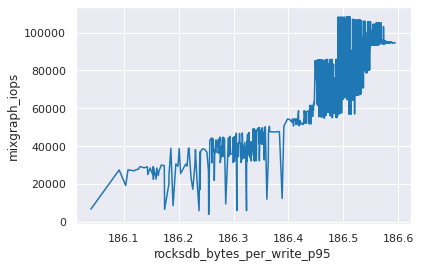

In [312]:
v = 'rocksdb_bytes_per_write_p95'
view_df = dataset_y[['mixgraph_iops', v]]
sns.lineplot(data=view_df, x=v, y="mixgraph_iops")
print(view_df.sort_values(by=v))



In [300]:
from autorocks.envs.rocksdb.space import RocksDBParamsSpaceV1
params = RocksDBParamsSpaceV1()

['max_background_compactions']

In [308]:
t_v = params.min_write_buffer_number_to_merge.name
param_to_cor = dataset_y.copy()
param_to_cor[t_v] = dataset_x[t_v]
correlations = param_to_cor.corr()
iops_corr = abs(correlations[t_v])
highly_relv_features = iops_corr[iops_corr>0.5].keys().tolist()
highly_relv_features

['FileReadStatsLevel0_count',
 'FileReadStatsLevel0_average',
 'FileReadStatsLevel0_stddev',
 'FileReadStatsLevel0_median',
 'FileReadStatsLevel0_max',
 'FileReadStatsLevel0_p50',
 'FileReadStatsLevel0_p75',
 'FileReadStatsLevel0_p99',
 'FileReadStatsLevel0_p99_9',
 'FileReadStatsLevel0_p99_99',
 'rocksdb_flush_write_bytes_count',
 'rocksdb_read_block_get_micros_p95',
 'rocksdb_read_block_get_micros_p99',
 'rocksdb_read_block_get_micros_sum',
 'rocksdb_db_seek_micros_p100',
 'rocksdb_sst_read_micros_p50',
 'rocksdb_sst_read_micros_p95',
 'rocksdb_sst_read_micros_p99',
 'rocksdb_sst_read_micros_p100',
 'rocksdb_sst_read_micros_count',
 'rocksdb_sst_read_micros_sum',
 'rocksdb_db_flush_micros_sum',
 'flush_gb_total',
 'flush_gb_interval',
 'level_0_score',
 'level_0_write_gb',
 'level_0_wnew_gb',
 'level_0_w_amp',
 'level_0_wr_mb_per_s',
 'level_0_comp_sec',
 'level_0_comp_merge_cpu_sec',
 'min_write_buffer_number_to_merge']